<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Overview</a></span></li><li><span><a href="#Importing-The-Data" data-toc-modified-id="Importing-The-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing The Data</a></span></li><li><span><a href="#Visualising-The-Data" data-toc-modified-id="Visualising-The-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualising The Data</a></span></li><li><span><a href="#Training-The-Model" data-toc-modified-id="Training-The-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training The Model</a></span></li><li><span><a href="#Evaluating-Model" data-toc-modified-id="Evaluating-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating Model</a></span></li></ul></div>

# Project Overview

# Importing The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fashion_train = pd.read_csv('input/fashion-mnist_train.csv', sep=',')

In [3]:
fashion_test = pd.read_csv('input/fashion-mnist_test.csv', sep=',')

# Visualising The Data

In [4]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(fashion_train.shape, fashion_test.shape)

(60000, 785) (10000, 785)


In [8]:
train = np.array(fashion_train, dtype='float32')

In [9]:
test = np.array(fashion_test, dtype='float32')

0.0

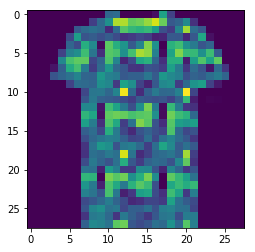

In [41]:
i = np.random.randint(1, 60000)
plt.imshow(train[i, 1:].reshape(28, 28))
label = train[i, 0]
label

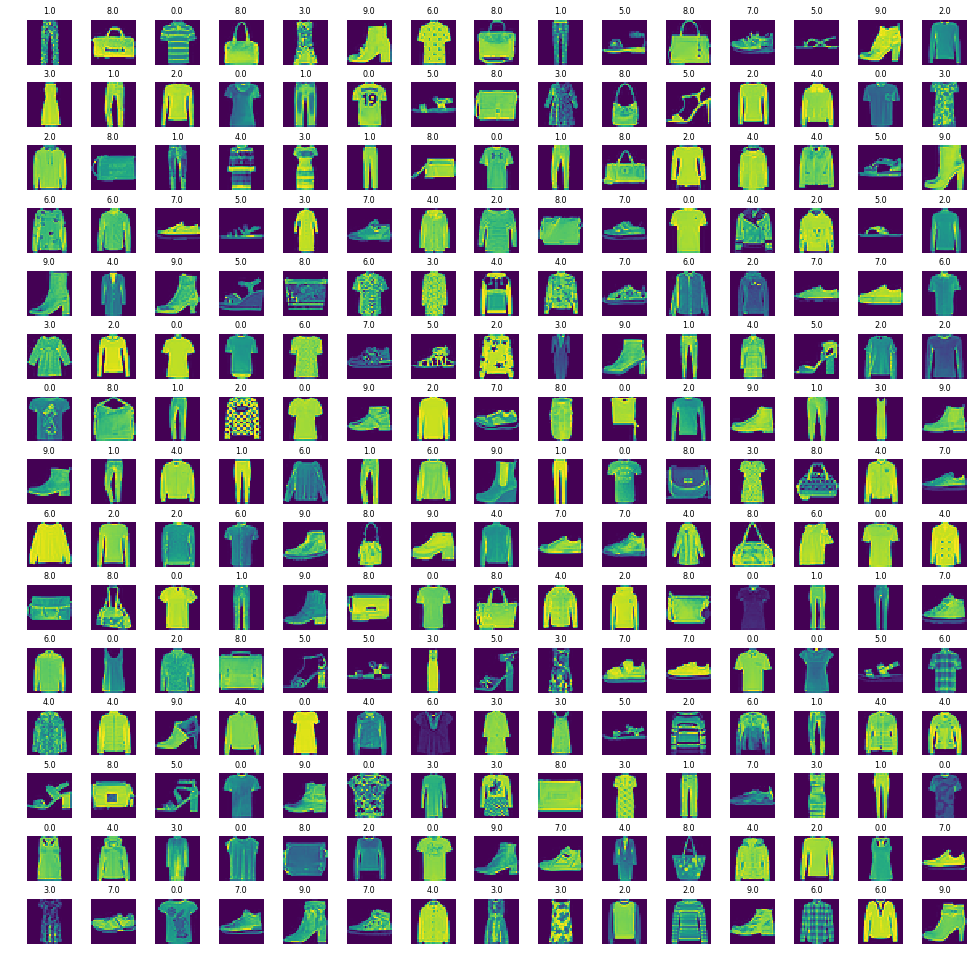

In [46]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel()
n_training = len(train)

for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(train[index, 1:].reshape(28, 28))
    axes[i].set_title(train[index, 0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Training The Model

In [47]:
X_train = train[:, 1:]/255
y_train = train[:, 0]

In [48]:
X_test = test[:, 1:]/255
y_test = test[:, 0]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [51]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [54]:
print(X_train.shape, X_validate.shape, X_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


In [57]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [58]:
cnn_model = Sequential()

In [59]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [60]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [61]:
cnn_model.add(Flatten())

In [62]:
cnn_model.add(Dense(output_dim=32, activation='relu'))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [63]:
cnn_model.add(Dense(output_dim=10, activation='sigmoid'))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [64]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [65]:
epochs = 50

In [66]:
cnn_model.fit(X_train, y_train, batch_size=512, nb_epoch=epochs, verbose=1, validation_data=(X_validate, y_validate))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 276us/step - loss: 0.8656 - acc: 0.7290 - val_loss: 0.4844 - val_acc: 0.8246
Epoch 2/50
48000/48000 [==============================] - 14s 290us/step - loss: 0.4421 - acc: 0.8448 - val_loss: 0.4472 - val_acc: 0.8472
Epoch 3/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.3842 - acc: 0.8658 - val_loss: 0.3679 - val_acc: 0.8732
Epoch 4/50
48000/48000 [==============================] - 14s 295us/step - loss: 0.3597 - acc: 0.8738 - val_loss: 0.3446 - val_acc: 0.8786
Epoch 5/50
48000/48000 [==============================] - 14s 295us/step - loss: 0.3320 - acc: 0.8848 - val_loss: 0.3420 - val_acc: 0.8790
Epoch 6/50
48000/48000 [==============================] - 14s 291us/step - loss: 0.3181 - acc: 0.8895 - val_loss: 0.3247 - val_acc: 0.8870
Epoch 7/50
48000/48000 [==============================] - 13s 276us/step - loss: 0.3034 - acc: 0.8947 - val_loss: 0.

# Evaluating Model

In [67]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 110us/step
Test accuracy: 0.913


In [68]:
predicted_classes = cnn_model.predict_classes(X_test)

In [69]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

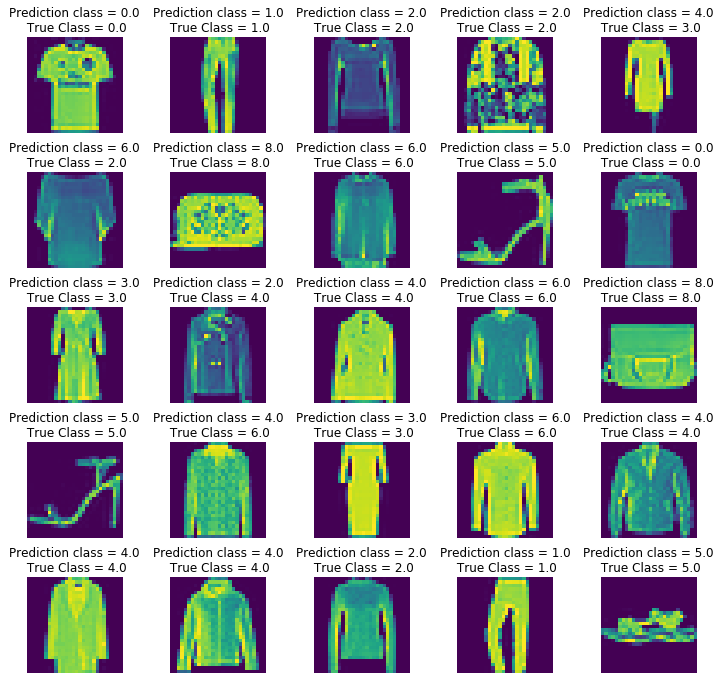

In [70]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)    

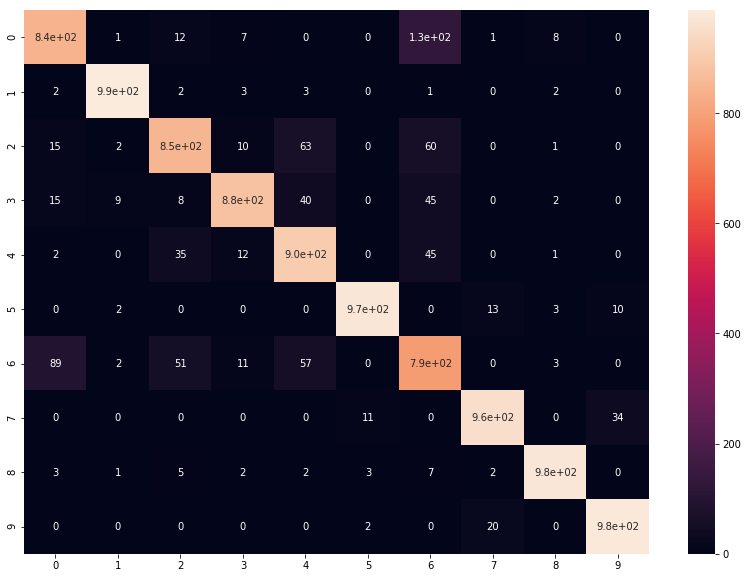

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [72]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.87      0.84      0.86      1000
    Class 1       0.98      0.99      0.99      1000
    Class 2       0.88      0.85      0.87      1000
    Class 3       0.95      0.88      0.91      1000
    Class 4       0.85      0.91      0.87      1000
    Class 5       0.98      0.97      0.98      1000
    Class 6       0.73      0.79      0.76      1000
    Class 7       0.96      0.95      0.96      1000
    Class 8       0.98      0.97      0.98      1000
    Class 9       0.96      0.98      0.97      1000

avg / total       0.91      0.91      0.91     10000

